In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
file = [f for f in os.listdir() if f.endswith('.csv')]

In [4]:
file

['gender_submission.csv', 'test.csv', 'train.csv']

In [11]:
gender_submission = pd.read_csv(file[0])
test = pd.read_csv(file[1])
train = pd.read_csv(file[2])
train['Family'] = train['SibSp'] + train['Parch']
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

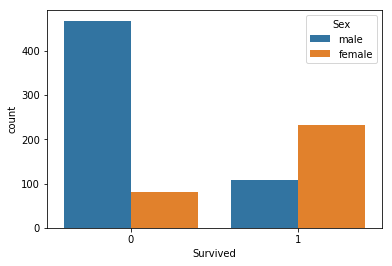

In [6]:
sns.countplot(x='Survived', data=train, hue="Sex")

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


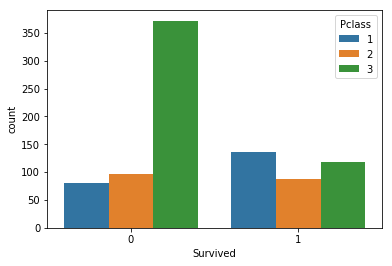

In [7]:
sns.countplot(x='Survived', data=train, hue="Pclass")
pclass_ratio = train[['Pclass', 'Survived']].groupby(['Pclass'],
                                                     as_index=False).mean().sort_values(by='Survived', ascending=False)
pclass_ratio

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


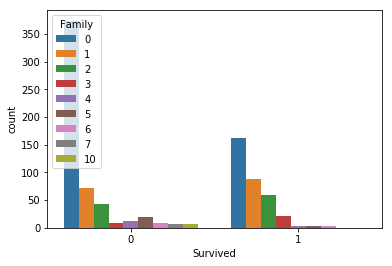

In [8]:
family_ratio=train[['Family', 'Survived']].groupby(['Family'],
                                      as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.countplot(x='Survived', data=train, hue="Family")
family_ratio

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


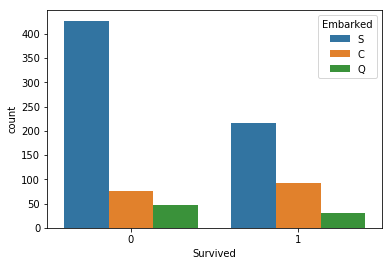

In [14]:
sns.countplot(x='Survived', data=train, hue='Embarked')
emb_ratio = train[['Embarked', 'Survived']].groupby(['Embarked'],
                                                   as_index=False).mean().sort_values(by='Survived')
emb_ratio

In [22]:
plt.subplot(2,1)
#sns.distplot(train['Age'], hist=True)

ValueError: Illegal argument(s) to subplot: (2, 1)

<Figure size 432x288 with 0 Axes>

In [20]:
for col in train.columns:
    if train[col].isnull().sum() > 0:
        print(col, train[col].isnull().sum())
for cols in test.columns:
    if test[cols].isnull().sum() > 0:
        print(cols, test[cols].isnull().sum())

Age 177
Cabin 687
Embarked 2
Age 86
Fare 1
Cabin 327


In [10]:
for col in train.columns:
    if train[col].isnull().sum() > 0:
        if train[col].dtype == 'object':
            val = train[col].dropna().value_counts().idxmax()
            train[col] = train[col].fillna(val)
        else:
            val = train[col].dropna().mean()
            train[col] = train[col].fillna(val)
for col in test.columns:
    if test[col].isnull().sum() > 0:
        if test[col].dtype == 'object':
            val = test[col].dropna().value_counts().idxmax()
            test[col] = test[col].fillna(val)
        else:
            val = test[col].dropna().mean()
            test[col] = test[col].fillna(val)

In [ ]:
train = pd.get_dummies(train, columns=['Sex'])

In [44]:
train = pd.get_dummies(train, columns=['Embarked'])

In [46]:
train['Pclass']

0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     3
26     3
27     1
28     3
29     3
      ..
861    2
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

Sex_male      -0.543351
Pclass        -0.338481
Embarked_S    -0.149683
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Embarked_Q     0.003650
Parch          0.081629
Embarked_C     0.168240
Fare           0.257307
Sex_female     0.543351
Survived       1.000000
Name: Survived, dtype: float64

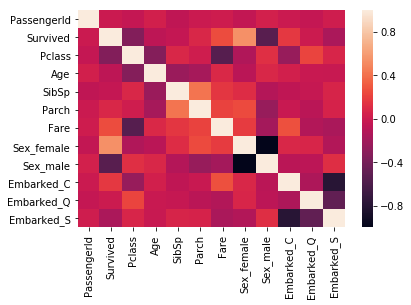

In [45]:
data = train.corr()
sns.heatmap(data)
data['Survived'].sort_values()

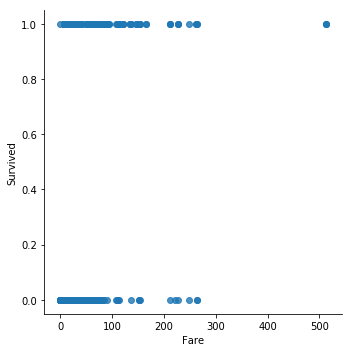

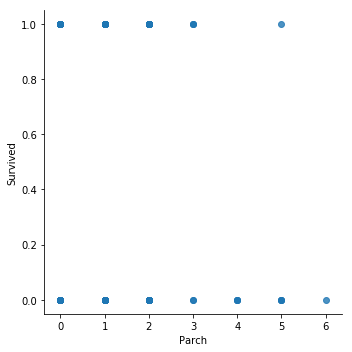

In [37]:
sns.lmplot(x='Fare', y='Survived',
          data=train, fit_reg=False)
sns.lmplot(x='Parch', y='Survived',
          data=train, fit_reg=False)

C:\Users\Tim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


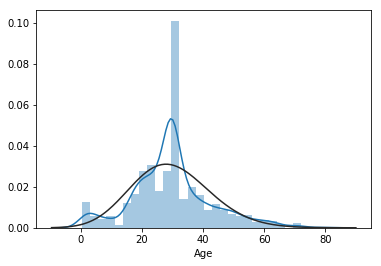

In [32]:
sns.distplot(train['Age'], kde=True, fit=stats.gamma)